In [1]:
import sys
import os

# Get the absolute path of the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Add it to sys.path if not already added
if project_root not in sys.path:
    sys.path.append(project_root)

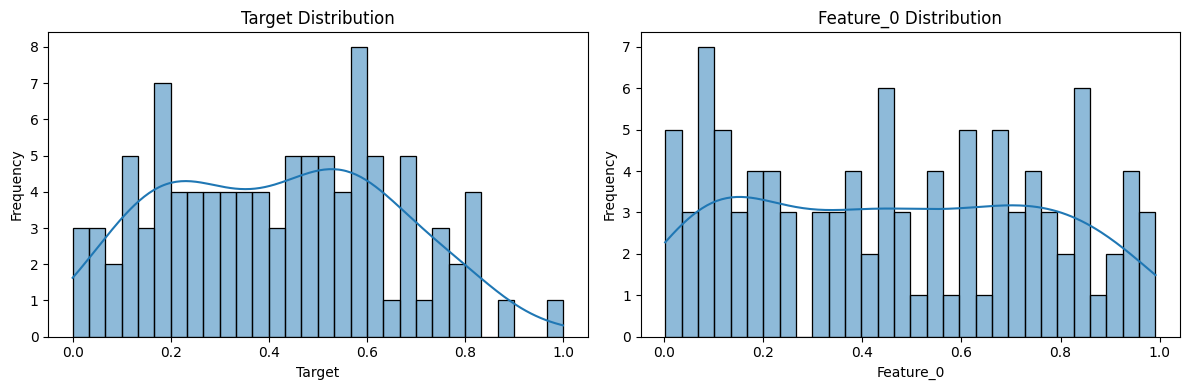


--- Dataset Info ---
Number of features: 20
Number of informative features: 5
Underlying feature distribution: Uniform [0, 1] (plus added noise features)
Train set size: 50
Test set size: 45
Calibration set size: 5
Train+Calibration set size: 55
----------------------------------------


Running online conformal prediction:   0%|          | 0/45 [00:00<?, ?it/s]

40
15
40
40
40
40
15
40
40
40
10
40
40
40
40
40
40
40
7
40
40
40
40
40
15
40
15
15
40
40
40
40
40
15
40
40
15
40
40
40
40
15
40
40
40


Running online conformal prediction:   0%|          | 0/45 [00:00<?, ?it/s]

40
15
15
40
10
15
40
40
15
15
40
15
40
10
40
40
40
40
40
40
40
40
40
40
40
40
40
10
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40


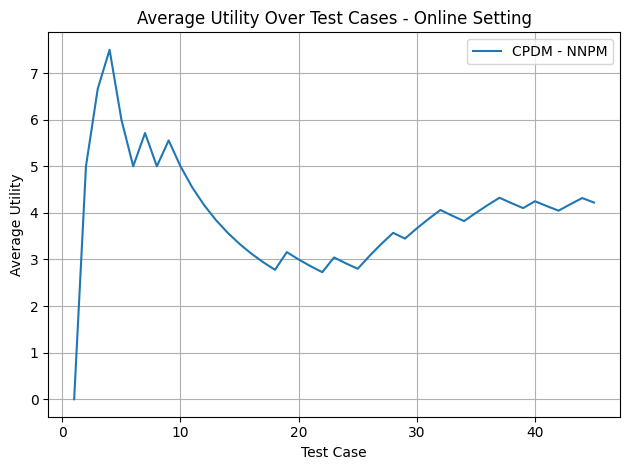

In [ ]:
from src.main import Main

# Parameters for data generation
df_params = {
    'N': 100,
    'F': 20,
    'diabetes': False,
    'feature_target_relationship': "friedman1", # make_regression, friedman1, friedman2, friedman3
    'n_informative': 5, # for make_regression
    'random_state': 2025, # When created only
    'noise': 0.1
}

# Utility values for decision outcomes
utility_dict = {
    'tp': 10,
    'tn': 6,
    'fp': 0,
    'fn': -8,
    'threshold': 0.5
}

# Data split ratios for training, testing, and calibration
datasplit_dict = {
    'train_test': 0.5,  # XX% of data initially goes to test+calibration
    'test_cal': 0.9,    # XX% of data goes to test
}

# TODO Bygg in logik för att göra så små set som möjligt

neighbors_list = [1, 3, 5, 7, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100]
train_fraction = (1 - datasplit_dict['train_test']) * 0.8
max_k = int(df_params['N'] * train_fraction)

n_neighbors_valid = (
    neighbors_list
    if df_params['diabetes']
    else [k for k in neighbors_list if k <= max_k]
)

grid_search_space = {
    'knn': {
        'n_neighbors': n_neighbors_valid,
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'ridge': {
        'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],
    }
}

config_dict = {
    'mode': "Online",
    'knn': True,
    'ridge': False,
    'gp': False,
    'bayesian_ridge': False,
    'optimal': False,
    'predictive': False,
    'model_selection': True, 
    'grid_search_space': grid_search_space,
    'confidence_n_runs': 10
}

plot_config = {
    'average_utility': True,
    'average_utility_with_confidence': False,
    'difference_from_optimal': False,
    'difference_from_optimal_with_confidence': False,
    'regret': False,
    'regret_with_confidence': False
}

# Instantiate and run Main class
main = Main(df_params, utility_dict, datasplit_dict, config_dict, plot_config)
main.run()